In [1]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models

In [2]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

REGISTER DATA FOR TRAINING AND MAKE IMAGFE TO DATA SET

In [3]:
# data_dir = 'data/Right'
# img_width, img_height = 256, 256 
# # Load images and labels
# X = []
# y = []

# # Loop through each class folder
# for label in os.listdir(data_dir):
#     label_dir = os.path.join(data_dir, label)
#     for img_file in os.listdir(label_dir):
#         img = load_img(os.path.join(label_dir, img_file), target_size=(img_width, img_height))
#         img_array = img_to_array(img)
#         X.append(img_array)
#         y.append(label)  # Assuming folder names correspond to class labels

# # Convert lists to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Normalize the pixel values
# X = X / 255.0

# # Create a dictionary to map class labels to integers
# label_map = {label: idx for idx, label in enumerate(np.unique(y))}

# # Convert class labels to integers using the dictionary
# y = np.array([label_map[label] for label in y])

# # One-hot encode the labels
# num_classes = len(label_map)
# y = to_categorical(y, num_classes=num_classes)

# # Split the data into train, validation, and test sets
# X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

OLD CODES

In [6]:
side = 'Right'
data = tf.keras.utils.image_dataset_from_directory(f'data/{side}')

data_iterator = data.as_numpy_iterator()
#Get another batch from the iterator
batch = data_iterator.next()

train_size = int(0.8 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

train = data.take(train_size)
test = data.skip(train_size)
val = test.skip(test_size).take(val_size)
test = test.take(test_size)

#hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#hist = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping_callback])

Found 1600 files belonging to 8 classes.


TRAIN MODEL

In [19]:
# # Define the CNN architecture
# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Flattening layer
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))

# # Output layer
# model.add(Dense(8, activation='softmax'))

# model.summary()

#plot_model(model, to_file = 'cnn_image_classifier_model.png', show_shapes = True, show_layer_names = True)

# Define the DCNN architecture
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))  # num_classes is the number of gait phases



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [8]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/50


40/40 [==============================] - 40s 951ms/step - loss: 551.3754 - accuracy: 0.5773 - val_loss: 0.3494 - val_accuracy: 0.8781
Epoch 2/50
40/40 [==============================] - 39s 956ms/step - loss: 0.2715 - accuracy: 0.9117 - val_loss: 0.2594 - val_accuracy: 0.9312
Epoch 3/50
40/40 [==============================] - 36s 896ms/step - loss: 0.0889 - accuracy: 0.9797 - val_loss: 0.1832 - val_accuracy: 0.9563
Epoch 4/50
40/40 [==============================] - 36s 887ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.2004 - val_accuracy: 0.9531
Epoch 5/50
40/40 [==============================] - 38s 947ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.1365 - val_accuracy: 0.9563
Epoch 6/50
40/40 [==============================] - 38s 953ms/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.1291 - val_accuracy: 0.9688
Epoch 7/50
40/40 [==============================] - 36s 900ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1186 - val_accuracy: 0.

PLOTS FOR LOSS AND ACCURACY

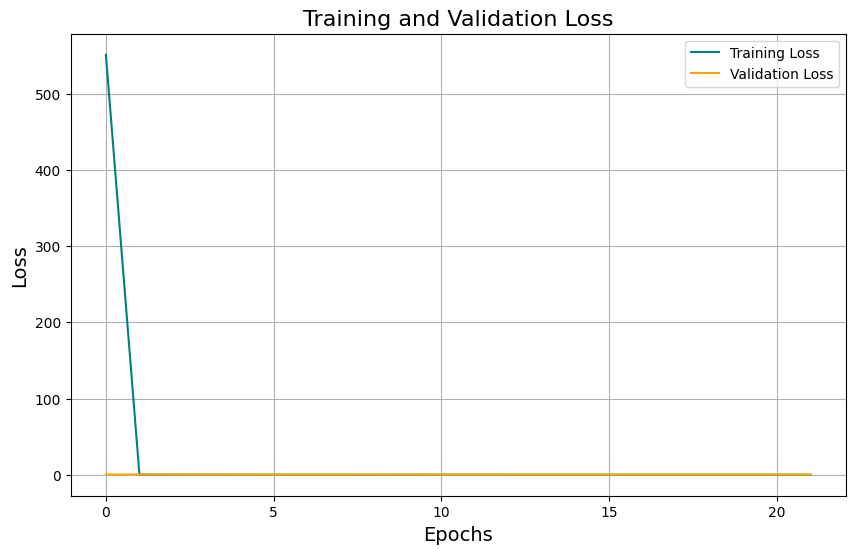

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], color='teal', label='Training Loss')
plt.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

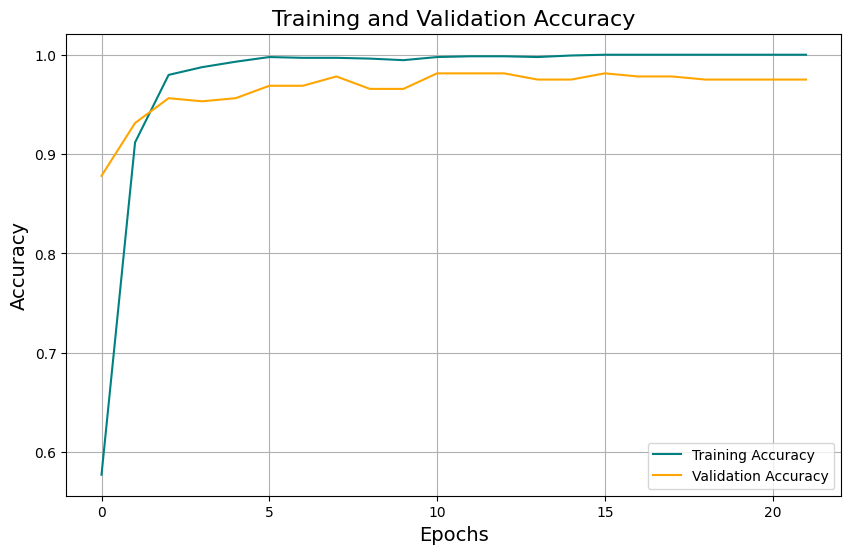

In [10]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

TESTING OF TRAINED MODEL

In [11]:
# from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# # Make predictions on the test set
# predictions = model.predict(test)
# predicted_classes = tf.argmax(predictions, axis=1)

# # Get the true labels
# true_labels = []
# for images, labels in test:
#     true_labels.extend(labels.numpy())

# # Compute the confusion matrix
# conf_matrix = confusion_matrix(true_labels, predicted_classes)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

# # Get classification report (includes precision, recall, F1-score, and support)
# class_names = data.class_names
# print("\nClassification Report:")
# print(classification_report(true_labels, predicted_classes, target_names=class_names))

In [13]:
#class_names = ['None','Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7', 'Phase 8']

CREATE H5 MODEL IN CNN DIRECTORY

In [14]:
date_time_format = '%Y_%m_%d__%H_%M_%S'
model.save(os.path.join('models', f'{side}_10_Pat_New2.h5'))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


USING THE H5 MODEL

In [15]:
# new_model = load_model(f'models/{side}_CNN_Model8.h5')

In [16]:
# img = cv2.imread(f'../test_data/{side}/Phase 1/vid1_2430.jpg')
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# resize = cv2.resize(img_rgb, (256, 256))
# normalized_img = resize / 255.0
# plt.imshow(resize)
# plt.show()
# yhat_single = new_model.predict(np.expand_dims(normalized_img, axis=0))
# predicted_class = int(np.argmax(yhat_single, axis=1))
# print(class_names[predicted_class])

In [7]:
class_names = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7', 'Phase 8']
phases = {name: [] for name in class_names}

# Load your pre-trained model
new_model = load_model(f'models/{side}_10_Pat_New2.h5')

# Directory containing test images
for i in range(1, 9):
    test_data_dir = f'../test_data/{side}/Phase {i}'
    num_list = [0] * 8  # Initialize the list of counts for each phase
    
    # List all files in the directory
    image_files = os.listdir(test_data_dir)

    for image_file in image_files:
        # Construct the full path to the image file
        image_path = os.path.join(test_data_dir, image_file)
        
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        
        # Convert BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Resize the image
        resize = cv2.resize(img_rgb, (256, 256))
        
        # Normalize the image
        normalized_img = resize / 255.0
        
        # Predict the class of the image
        yhat_single = new_model.predict(np.expand_dims(normalized_img, axis=0))
        predicted_class = int(np.argmax(yhat_single, axis=1))
        
        # Increment the count for the predicted class
        num_list[predicted_class] += 1

    # Assign the counts to the corresponding phase list
    phases[class_names[i-1]] = num_list


1/1 [==============================] - 0s 35ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_12084\596821930.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(np.argmax(yhat_single, axis=1))


1/1 [==============================] - 0s 36ms/step


In [8]:
# Printing values of all phases from 1 to 8
for phase_name, phase_values in phases.items():
    print(phase_name + ":", ' '.join(map(str, phase_values)))


Phase 1: 29 0 0 0 0 0 0 1
Phase 2: 0 26 3 0 0 1 0 0
Phase 3: 0 0 25 0 0 5 0 0
Phase 4: 0 0 2 21 1 6 0 0
Phase 5: 0 0 0 0 20 10 0 0
Phase 6: 0 0 0 0 0 30 0 0
Phase 7: 0 0 0 0 0 2 26 2
Phase 8: 0 0 0 0 0 0 0 30
